In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from multiprocessing import Pool

from keras.models import Model
from keras.optimizers import Adam
from keras.models import load_model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Input, LSTM, BatchNormalization, Dropout, Dense, Add, Flatten

from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

2024-08-22 05:52:16.309033: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-22 05:52:16.359704: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-22 05:52:16.359742: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 05:52:16.359772: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-22 05:52:16.368529: I tensorflow/core/platform/cpu_feature_g

In [2]:
syscalls = [
"sys_enter_llistxattr",
"sys_enter_setgroups",
"sys_enter_lremovexattr",
"sys_enter_sethostname",
"sys_enter_accept",
"sys_enter_lseek",
"sys_enter_setitimer",
"sys_enter_accept4",
"sys_enter_lsetxattr",
"sys_enter_setns",
"sys_enter_acct",
"sys_enter_madvise",
"sys_enter_setpgid",
"sys_enter_add_key",
"sys_enter_mbind",
"sys_enter_setpriority",
"sys_enter_adjtimex",
"sys_enter_membarrier",
"sys_enter_setregid",
"sys_enter_personality",
"sys_enter_memfd_create",
"sys_enter_setresgid",
"sys_enter_bind",
"sys_enter_memfd_secret",
"sys_enter_setresuid",
"sys_enter_bpf",
"sys_enter_migrate_pages",
"sys_enter_setreuid",
"sys_enter_brk",
"sys_enter_mincore",
"sys_enter_setrlimit",
"sys_enter_capget",
"sys_enter_mkdirat",
"sys_enter_setsid",
"sys_enter_capset",
"sys_enter_mknodat",
"sys_enter_setsockopt",
"sys_enter_chdir",
"sys_enter_mlock",
"sys_enter_settimeofday",
"sys_enter_chroot",
"sys_enter_mlock2",
"sys_enter_setuid",
"sys_enter_clock_adjtime",
"sys_enter_mlockall",
"sys_enter_setxattr",
"sys_enter_clock_getres",
"sys_enter_mmap",
"sys_enter_shmat",
"sys_enter_clock_gettime",
"sys_enter_mount",
"sys_enter_shmctl",
"sys_enter_clock_nanosleep",
"sys_enter_mount_setattr",
"sys_enter_shmdt",
"sys_enter_clock_settime",
"sys_enter_move_mount",
"sys_enter_shmget",
"sys_enter_clone",
"sys_enter_move_pages",
"sys_enter_shutdown",
"sys_enter_clone3",
"sys_enter_mprotect",
"sys_enter_sigaltstack",
"sys_enter_close",
"sys_enter_mq_getsetattr",
"sys_enter_signalfd4",
"sys_enter_close_range",
"sys_enter_mq_notify",
"sys_enter_socket",
"sys_enter_connect",
"sys_enter_mq_open",
"sys_enter_socketpair",
"sys_enter_copy_file_range",
"sys_enter_mq_timedreceive",
"sys_enter_splice",
"sys_enter_delete_module",
"sys_enter_mq_timedsend",
"sys_enter_statfs",
"sys_enter_dup",
"sys_enter_mq_unlink",
"sys_enter_statx",
"sys_enter_dup3",
"sys_enter_mremap",
"sys_enter_swapoff",
"sys_enter_epoll_create1",
"sys_enter_msgctl",
"sys_enter_swapon",
"sys_enter_epoll_ctl",
"sys_enter_msgget",
"sys_enter_symlinkat",
"sys_enter_epoll_pwait",
"sys_enter_msgrcv",
"sys_enter_sync",
"sys_enter_epoll_pwait2",
"sys_enter_msgsnd",
"sys_enter_sync_file_range",
"sys_enter_eventfd2",
"sys_enter_msync",
"sys_enter_syncfs",
"sys_enter_execve",
"sys_enter_munlock",
"sys_enter_sysinfo",
"sys_enter_execveat",
"sys_enter_munlockall",
"sys_enter_syslog",
"sys_enter_exit",
"sys_enter_munmap",
"sys_enter_tee",
"sys_enter_exit_group",
"sys_enter_name_to_handle_at",
"sys_enter_tgkill",
"sys_enter_faccessat",
"sys_enter_nanosleep",
"sys_enter_timer_create",
"sys_enter_faccessat2",
"sys_enter_newfstat",
"sys_enter_timer_delete",
"sys_enter_fadvise64",
"sys_enter_newfstatat",
"sys_enter_timer_getoverrun",
"sys_enter_fallocate",
"sys_enter_newuname",
"sys_enter_timer_gettime",
"sys_enter_fanotify_init",
"sys_enter_open_by_handle_at",
"sys_enter_timer_settime",
"sys_enter_fanotify_mark",
"sys_enter_open_tree",
"sys_enter_timerfd_create",
"sys_enter_fchdir",
"sys_enter_openat",
"sys_enter_timerfd_gettime",
"sys_enter_fchmod",
"sys_enter_openat2",
"sys_enter_timerfd_settime",
"sys_enter_fchmodat",
"sys_enter_perf_event_open",
"sys_enter_times",
"sys_enter_fchown",
"sys_enter_pidfd_getfd",
"sys_enter_tkill",
"sys_enter_fchownat",
"sys_enter_pidfd_open",
"sys_enter_truncate",
"sys_enter_fcntl",
"sys_enter_pidfd_send_signal",
"sys_enter_umask",
"sys_enter_fdatasync",
"sys_enter_pipe2",
"sys_enter_umount",
"sys_enter_fgetxattr",
"sys_enter_pivot_root",
"sys_enter_unlinkat",
"sys_enter_finit_module",
"sys_enter_ppoll",
"sys_enter_unshare",
"sys_enter_flistxattr",
"sys_enter_prctl",
"sys_enter_userfaultfd",
"sys_enter_flock",
"sys_enter_pread64",
"sys_enter_utimensat",
"sys_enter_fremovexattr",
"sys_enter_preadv",
"sys_enter_vhangup",
"sys_enter_fsconfig",
"sys_enter_preadv2",
"sys_enter_vmsplice",
"sys_enter_fsetxattr",
"sys_enter_prlimit64",
"sys_enter_wait4",
"sys_enter_fsmount",
"sys_enter_process_madvise",
"sys_enter_waitid",
"sys_enter_fsopen",
"sys_enter_process_mrelease",
"sys_enter_write",
"sys_enter_fspick",
"sys_enter_process_vm_readv",
"sys_enter_writev",
"sys_enter_fstatfs",
"sys_enter_process_vm_writev",
"sys_enter_fsync",
"sys_enter_pselect6",
"sys_enter_ftruncate",
"sys_enter_ptrace",
"sys_enter_futex",
"sys_enter_pwrite64",
"sys_enter_get_mempolicy",
"sys_enter_pwritev",
"sys_enter_get_robust_list",
"sys_enter_pwritev2",
"sys_enter_getcpu",
"sys_enter_quotactl",
"sys_enter_getcwd",
"sys_enter_quotactl_fd",
"sys_enter_getdents64",
"sys_enter_read",
"sys_enter_getegid",
"sys_enter_readahead",
"sys_enter_geteuid",
"sys_enter_readlinkat",
"sys_enter_getgid",
"sys_enter_readv",
"sys_enter_getgroups",
"sys_enter_reboot",
"sys_enter_getitimer",
"sys_enter_recvfrom",
"sys_enter_getpeername",
"sys_enter_recvmmsg",
"sys_enter_getpgid",
"sys_enter_recvmsg",
"sys_enter_getpid",
"sys_enter_remap_file_pages",
"sys_enter_getppid",
"sys_enter_removexattr",
"sys_enter_getpriority",
"sys_enter_renameat",
"sys_enter_getrandom",
"sys_enter_renameat2",
"sys_enter_getresgid",
"sys_enter_request_key",
"sys_enter_getresuid",
"sys_enter_restart_syscall",
"sys_enter_getrlimit",
"sys_enter_rseq",
"sys_enter_getrusage",
"sys_enter_rt_sigaction",
"sys_enter_getsid",
"sys_enter_rt_sigpending",
"sys_enter_getsockname",
"sys_enter_rt_sigprocmask",
"sys_enter_getsockopt",
"sys_enter_rt_sigqueueinfo",
"sys_enter_gettid",
"sys_enter_rt_sigreturn",
"sys_enter_gettimeofday",
"sys_enter_rt_sigsuspend",
"sys_enter_getuid",
"sys_enter_rt_sigtimedwait",
"sys_enter_getxattr",
"sys_enter_rt_tgsigqueueinfo",
"sys_enter_init_module",
"sys_enter_sched_get_priority_max",
"sys_enter_inotify_add_watch",
"sys_enter_sched_get_priority_min",
"sys_enter_inotify_init1",
"sys_enter_sched_getaffinity",
"sys_enter_inotify_rm_watch",
"sys_enter_sched_getattr",
"sys_enter_io_cancel",
"sys_enter_sched_getparam",
"sys_enter_io_destroy",
"sys_enter_sched_getscheduler",
"sys_enter_io_getevents",
"sys_enter_sched_rr_get_interval",
"sys_enter_io_pgetevents",
"sys_enter_sched_setaffinity",
"sys_enter_io_setup",
"sys_enter_sched_setattr",
"sys_enter_io_submit",
"sys_enter_sched_setparam",
"sys_enter_io_uring_enter",
"sys_enter_sched_setscheduler",
"sys_enter_io_uring_register",
"sys_enter_sched_yield",
"sys_enter_io_uring_setup",
"sys_enter_seccomp",
"sys_enter_ioctl",
"sys_enter_semctl",
"sys_enter_ioprio_get",
"sys_enter_semget",
"sys_enter_ioprio_set",
"sys_enter_semop",
"sys_enter_kcmp",
"sys_enter_semtimedop",
"sys_enter_kexec_file_load",
"sys_enter_sendfile64",
"sys_enter_kexec_load",
"sys_enter_sendmmsg",
"sys_enter_keyctl",
"sys_enter_sendmsg",
"sys_enter_kill",
"sys_enter_sendto",
"sys_enter_landlock_add_rule",
"sys_enter_set_mempolicy",
"sys_enter_landlock_create_ruleset",
"sys_enter_set_robust_list",
"sys_enter_landlock_restrict_self",
"sys_enter_set_tid_address",
"sys_enter_lgetxattr",
"sys_enter_setdomainname",
"sys_enter_linkat",
"sys_enter_setfsgid",
"sys_enter_listen",
"sys_enter_setfsuid",
"sys_enter_listxattr",
"sys_enter_setgid"
]

In [3]:
NUM_CLASSES = 3
CLASSES = np.array(['benign', 'sysrv', 'xmrig'])
DATASET_DIR = "raw_data/"
VECTOR_LENGTH = 32 * 32

label_encoder = LabelEncoder()
label_encoder.fit(syscalls)

def csvToVector(file_path):
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='ISO-8859-1')
    
    data_encoded = label_encoder.fit_transform(data['SYSTEM_CALL'])
    vector = np.zeros(VECTOR_LENGTH, dtype=np.uint8)
    syscall_nums = min(len(data_encoded), VECTOR_LENGTH)
    vector[:syscall_nums] = data_encoded[:syscall_nums]

    return vector

def process_file(args):
    file_path, class_idx = args
    vector = csvToVector(file_path)
    return vector, class_idx

def load_data(dataset_dir):
    x = []
    y = []
    classes = ["0/90sec_0", "1/90sec_1", "2/90sec_2"]

    file_paths = []
    for class_idx, class_name in enumerate(classes):
        class_dir = os.path.join(dataset_dir, class_name)
        for file_name in os.listdir(class_dir):
            if file_name.endswith('.csv'):
                file_path = os.path.join(class_dir, file_name)
                file_paths.append((file_path, class_idx))

    with Pool() as pool:
        results = pool.map(process_file, file_paths)

    x, y = zip(*results)
    x = np.array(x)
    y = np.array(y)

    return x, y

In [4]:
X, y = load_data(DATASET_DIR)

In [5]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train = X_train / 299.0
X_val = X_val / 299.0
X_test = X_test / 299.0

y_train = to_categorical(y_train, 3)
y_val = to_categorical(y_val, 3)
y_test = to_categorical(y_test, 3)

In [6]:
cp_model = load_model('90_LSTM_checkpoint.h5')

2024-08-22 05:52:40.445812: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 511 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:86:00.0, compute capability: 7.0
2024-08-22 05:52:40.494431: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:746] failed to allocate 511.00MiB (535822336 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory


 1/15 [=>............................] - ETA: 16s

2024-08-22 05:52:42.613104: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907


15/15 [==============================] - 2s 39ms/step


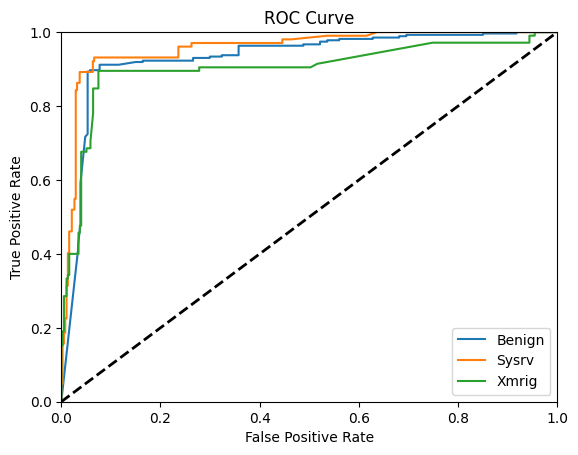

In [7]:
y_pred_proba = cp_model.predict(X_test)

y_test_binary = np.argmax(y_test, axis=1)

n_classes = y_test.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_binarized = label_binarize(y_test_binary, classes=[0, 1, 2])

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
class_labels = ['Benign', 'Sysrv', 'Xmrig']    
    
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [8]:
y_pred = cp_model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_test_classes = tf.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes, digits=4))
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

class_labels = ['Benign', 'Sysrv', 'Xmrig']

conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

print("Confusion Matrix:")
print(conf_matrix_df)

15/15 [==============================] - 1s 38ms/step
              precision    recall  f1-score   support

           0     0.9563    0.8860    0.9198       272
           1     0.8641    0.8725    0.8683       102
           2     0.7581    0.8952    0.8210       105

    accuracy                         0.8852       479
   macro avg     0.8595    0.8846    0.8697       479
weighted avg     0.8932    0.8852    0.8872       479

Confusion Matrix:
        Benign  Sysrv  Xmrig
Benign     241     11     20
Sysrv        3     89     10
Xmrig        8      3     94
